In [1]:
# CHENGZHI DONG
# ID 112890166
# CSE 353 
# Assignment 4

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
import random
import time

In [3]:
# File name
x_file = "X.txt"
y_file = "Y.txt"

# Load data into matrix
x_data = np.loadtxt(x_file, delimiter = ',') 
y_data = np.loadtxt(y_file, delimiter = ',')

# Data size
sample_size = len(x_data)
x_size = len(x_data[0])

In [4]:
# Sign function
def sign(s):
    if(s < 0):
        return -1
    elif(s > 0):
        return 1
    else:
        return 0

In [5]:
# Sigmoid function
def sig(s):
    result = 1/(1 + np.power(np.e, -s))
    return result

In [6]:
# Count the number of error with given w, x, y
def count_error (w, x_data, y_data):
    data_size = len(x_data)
    err = 0
    for n in range(data_size):
        if sign(np.dot(w,x_data[n])) != y_data[n]:
            err += 1
    return err

In [7]:
# Linear Regression algorithm 
def LinearReg_algorithm(x_data, y_data):
    # Closed form solution = (X^T * X)^-1 * X^T * Y
    x_transpose = np.transpose(x_data)
    xx_inv = np.linalg.inv(np.matmul(x_transpose, x_data))
    result = np.matmul(np.matmul(xx_inv, x_transpose), y_data)
    return result

In [8]:
# PLA algorithm
def PLA_algorithm(w_0, x_data, y_data):
    
    # Get the data size, set w_0 as the initial w_PLA, set a loop order of the data, and initial iteration time
    data_size = len(x_data)
    w_PLA = np.copy(w_0)
    order = np.arange(0, data_size)
    time = 0
    
    # Keep correct mistake until there is no more mistake
    while True:
        
        # iteration time increase by 1
        time += 1    
        
        # flag for error or mistake
        error_flag = False
        
        # loop with a naive order
        for n in order:
            
            # if a mistake was found, correct it by w_PLA <- w_PLA + y_n * x_n
            if sign(np.dot(w_PLA, x_data[n])) != y_data[n]:
                w_PLA = w_PLA + (y_data[n]* x_data[n])
                error_flag = True
                break
                
        # If no error was found, it is done     
        if not error_flag:
            break
    
    # return the final w_PLA and the iteration time as dict.
    result = {"w_PLA" : w_PLA, "Time" : time}
    return result

In [9]:
# Logistic Regression algorithm 
def LogisticReg_algorithm(w_0, step, x_data, y_data, max_iteration):
    
    # set w_0 as the initial wLogisticReg, get data size and x size, initialize iteration time to 0
    wLogisticReg = np.copy(w_0)
    data_size = len(x_data)
    x_size = len(x_data[0])
    time = 0
    
    # loop for at most max_iteration times to find optimal wLogisticReg by Gradient Descent
    for t in range(max_iteration):
        time += 1
        
        # initialize the summation of sig to zeros
        sig_sum = np.zeros(x_size)
        
        # calculate the summation of sig(-y_n*wLogistic^T*x_n)*(y_n*x_n)
        for n in range(data_size):
            sig_sum += sig(-y_data[n]*np.dot(wLogisticReg, x_data[n]))*(y_data[n]*x_data[n])
            
        # Gradient of Logistic Regression Error
        eLogisticReg = (1/data_size)*sig_sum
        
        # if the norm2 is small enough, stop iteration
        if( np.dot(eLogisticReg,eLogisticReg) <= 0.00001):
            break
            
        # else Gradient Descent
        wLogisticReg += step * eLogisticReg
        
    # return the final wLogisticReg and iteration time as dict.
    result = {"wLogisticReg" : wLogisticReg, "Time" : time}
    return result

In [10]:
# Logistic Regression with Stochastic Gradient Descent algorithm 
def SGD_LogisticReg_algorithm(w_0, step, k, x_data, y_data, max_iteration):
    
    # set w_0 as the initial  wSGD, get data size and x size, initialize iteration time to 0
    wSGD = np.copy(w_0)
    data_size = len(x_data)
    x_size = len(x_data[0])
    time = 0
    
    # initialize a random order for k selection
    random_order = np.arange(0, data_size)
    
    # loop for at most max_iteration times to find optimal wSGD by Stochastic Gradient Descent
    for t in range(max_iteration):
        time += 1
        
        # random shuffle the random order and select the first k samples
        random.shuffle(random_order)
        random_samples = random_order[0:k]
        
        # calculate the summation of the random k samples of sig(-y_n*wLogistic^T*x_n)*(y_n*x_n)
        sig_sum = np.zeros(x_size)
        for n in random_samples:
            sig_sum += sig(-y_data[n]*np.dot(wSGD, x_data[n]))*(y_data[n]*x_data[n])
        
        # Gradient of Logistic Regression Error among the random k samples
        eSGD = (1/k)*sig_sum
        
        # if the norm2 is small enough, stop iteration
        if( np.dot(eSGD,eSGD) <= 0.00001):
            break
            
        # else Stochastic Gradient Descent    
        wSGD += step * eSGD

    # return the final wSGD and iteration time as dict.
    result = {"wSGD" : wSGD, "Time" : time}
    return result

In [11]:
# Plot the points and desicion boundary for visualization
def visualization(w, x_data, y_data, title):
    data_size = len(x_data)
    
    # Find the x1 and x2 values for the two end points of the decision boundary line for visualization
    x1_min = x_data[1][0]
    x1_max = x_data[1][0]
    x2_min = x_data[2][0]
    x2_max = x_data[2][0]
    
    # Create positive and negative arrays for x1 and x2 for plotting
    x1_pos = np.array([])
    x1_neg = np.array([])
    x2_pos = np.array([])
    x2_neg = np.array([])
    for s in range(data_size):
        x_point = x_data[s]
        # Find the min and max of x1 and x2 for plotting the decision boundary line
        if x1_min > x_point[1]:
            x1_min = x_point[1]
        if x1_max < x_point[1]:
            x1_max = x_point[1]
        if x2_min > x_point[2]:
            x2_min = x_point[2]
        if x2_max < x_point[2]:
            x2_max = x_point[2]

        if(y_data[s] == 1):
            x1_pos = np.append(x1_pos, [x_point[1]])
            x2_pos = np.append(x2_pos, [x_point[2]])    
        else:
            x1_neg = np.append(x1_neg, [x_point[1]])
            x2_neg = np.append(x2_neg, [x_point[2]])  
    
    # Visualization
    plt.title(title)
    plt.scatter(x1_pos, x2_pos, color='blue', label="+1") 
    plt.scatter(x1_neg, x2_neg, color='red', label="-1")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("X_1")
    plt.ylabel("X_2")
        
    if w[2] != 0:
        # Find the x2 values for the two end points of the decision boundary line for visualization
        x2_min = ( 0 - ( w[0] + w[1] * x1_min ) ) / w[2]
        x2_max = ( 0 - ( w[0] + w[1] * x1_max ) ) / w[2]
        # Visualization
        plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "green")
    else:
        # else if w[2] is zero, it will be a vertical line
        # Visualization
        plt.vlines(-w[0]/w[1], x2_min, x2_max, color = "green")
    
    plt.show()


Part1(a):
w_LinearRegression:[-0.07882655  2.04885018 -1.79061198]

Part1(b):


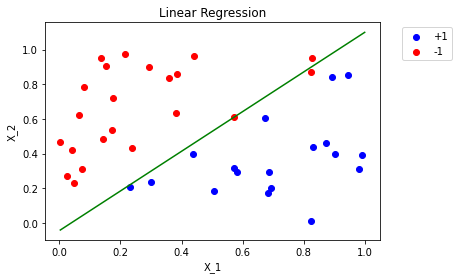

Number of Error for w_LinearRegression: 1
Error Rate for w_LinearRegression: 0.025

Part1(c):
Initialize w with w_LinearRegression:


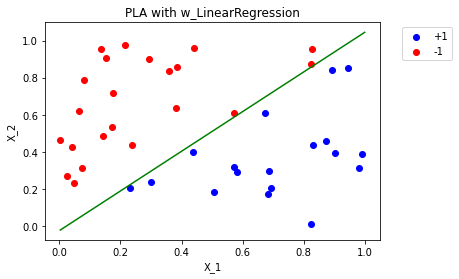

w_PLA:[-0.07882655  3.35325018 -3.13411198]
Error Rate: 0.0
Iterations: 13
Initialize w with zero vector:


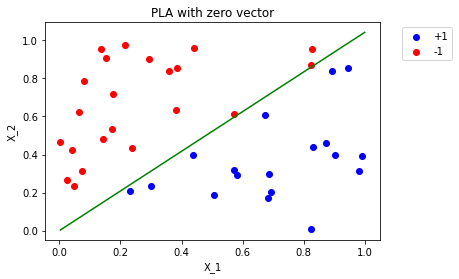

w_PLA:[ 0.      3.8812 -3.7239]
Error Rate: 0.0
Iterations: 31


In [12]:
# Part 1: Linear Regression

# a: Implement your Linear Regression algorithm on this dataset and obtain your wLinearReg.
print()
print("Part1(a):")
w_linear_regression = LinearReg_algorithm(x_data, y_data)
print( "w_LinearRegression:" + str( w_linear_regression ) )
print("============================================================")

# b: Apply your wLinearRegression to the dataset for binary classification and compute your error rate

print()
print("Part1(b):")
visualization(w_linear_regression, x_data, y_data, "Linear Regression")
error = count_error(w_linear_regression, x_data, y_data)
error_rate = error/sample_size
print("Number of Error for w_LinearRegression: " + str(error))
print("Error Rate for w_LinearRegression: " + str(error_rate))
print("============================================================")


# c: Using wLinearRegression as the initialization on wPLA to train your perceptron learning algorithm

print()
print("Part1(c):")
# Initialize w_0 as wLinearRegression 
time_start_PLA_LinearRegression = time.time()
PLA_LinearRegression = PLA_algorithm(w_linear_regression, x_data, y_data)
time_end_PLA_LinearRegression = time.time()
print("Initialize w with w_LinearRegression:")
visualization(PLA_LinearRegression["w_PLA"], x_data, y_data, "PLA with w_LinearRegression")
print("w_PLA:" + str(PLA_LinearRegression["w_PLA"]))
error = count_error(PLA_LinearRegression["w_PLA"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: "+ str(PLA_LinearRegression["Time"]))
print("============================================================")


# Initialize w_0 as zeros
time_start_PLA_zeros = time.time()
PLA_zeros = PLA_algorithm(np.zeros(x_size), x_data, y_data)
time_end_PLA_zeros = time.time()
print("Initialize w with zero vector:")
visualization(PLA_zeros["w_PLA"], x_data, y_data, "PLA with zero vector")
print("w_PLA:" + str(PLA_zeros["w_PLA"]))
error = count_error(PLA_zeros["w_PLA"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: "+str(PLA_zeros["Time"]))
print("============================================================")


Part2(a)
Logistic Regression that initialize with zero vector and has a learning rate of 5
w_LogisticRegression: [  1.2891256   16.56967867 -18.01727107]

Part2(b)


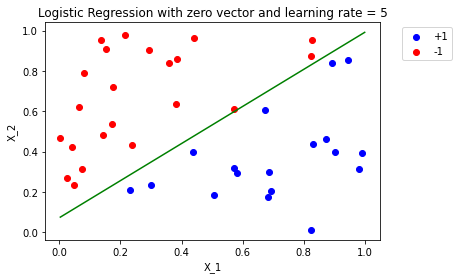

Error Rate: 0.0
Iterations: 586
Runtime: 0.20247793197631836 seconds

Part2(c)


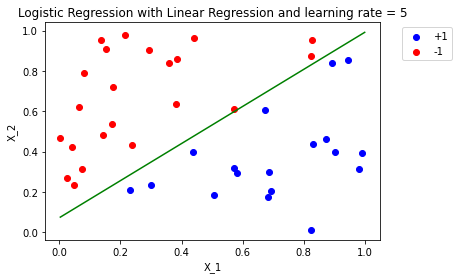

w_LogisticRegression:[  1.28855179  16.56460268 -18.01140722]
Error Rate: 0.0
Iterations: 580
Runtime: 0.1855003833770752 seconds


In [13]:
# Part 2  Logistic Regression

# (a) Implement your Logistic Regression algorithm on this dataset and obtain your w_LogisticRegression

print()
print("Part2(a)")
print("Logistic Regression that initialize with zero vector and has a learning rate of 5") 
time_start_LogReg_zeros = time.time()
LogReg_zeros = LogisticReg_algorithm(np.zeros(x_size), 5, x_data, y_data, 10000)
time_end_LogReg_zeros = time.time()
print("w_LogisticRegression: " + str(LogReg_zeros["wLogisticReg"]))
print("============================================================")


# (b) Apply your w_LogisticRegression to the dataset for binary classification and compute your error rate
print()
print("Part2(b)")
visualization(LogReg_zeros["wLogisticReg"], x_data, y_data, "Logistic Regression with zero vector and learning rate = 5")
error = count_error(LogReg_zeros["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_zeros["Time"]))
print("Runtime: " + str(time_end_LogReg_zeros-time_start_LogReg_zeros) + " seconds")
print("============================================================")

# (c) using w_LinearRegression as the initialization in the logistic regression
print()
print("Part2(c)")
time_start_LogReg_LinReg = time.time()
LogReg_LinReg = LogisticReg_algorithm(w_linear_regression, 5, x_data, y_data, 10000)
time_end_LogReg_LinReg = time.time()
visualization(LogReg_LinReg["wLogisticReg"], x_data, y_data, "Logistic Regression with Linear Regression and learning rate = 5")
print("w_LogisticRegression:" + str(LogReg_LinReg["wLogisticReg"]))
error = count_error(LogReg_LinReg["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_LinReg["Time"]))
print("Runtime: " + str(time_end_LogReg_LinReg-time_start_LogReg_LinReg)+ " seconds")
print("============================================================")

Part2(d)
Initialize w_0 with zero vector and different learning rates


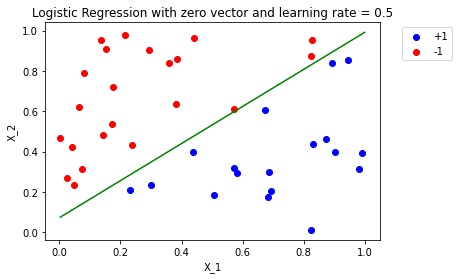

w_LogisticRegression:[  1.2884465   16.56378952 -18.01044708]
Error Rate: 0.0
Iterations: 5862
Runtime: 1.8409364223480225 seconds


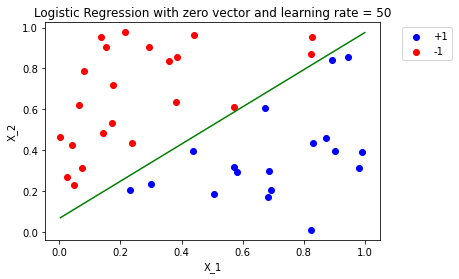

w_LogisticRegression:[  2.47049619  33.19997855 -36.57641007]
Error Rate: 0.0
Iterations: 70
Runtime: 0.02294135093688965 seconds


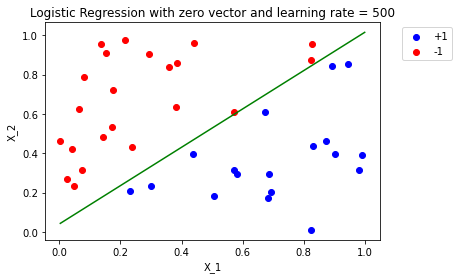

w_LogisticRegression:[  14.00050038  329.92017438 -339.13805362]
Error Rate: 0.0
Iterations: 32
Runtime: 0.013207435607910156 seconds
Initialize w_0 with Linear Regression and different learning rates


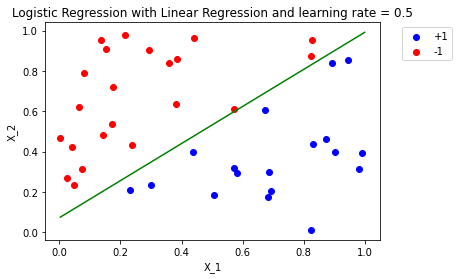

w_LogisticRegression:[  1.28842569  16.56360537 -18.01023436]
Error Rate: 0.0
Iterations: 5804
Runtime: 1.8457813262939453 seconds


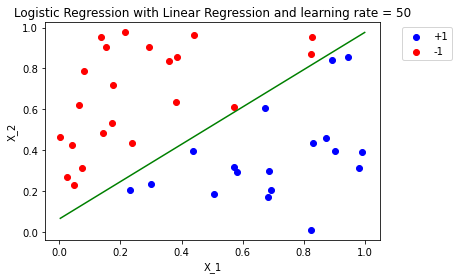

w_LogisticRegression:[  2.37533852  33.38999873 -36.63735223]
Error Rate: 0.0
Iterations: 54
Runtime: 0.01795172691345215 seconds


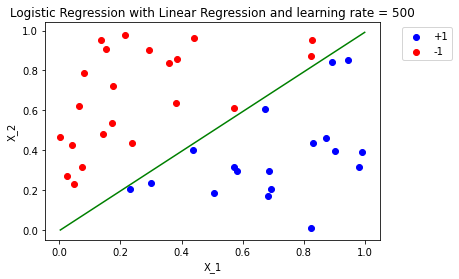

w_LogisticRegression:[  -1.39422886  336.39908171 -338.07775853]
Error Rate: 0.0
Iterations: 20
Runtime: 0.007983684539794922 seconds


In [14]:
# Part 2  Logistic Regression

# (d) using different learning rates in the logistic regression

print("Part2(d)")

# Initialize w_0 with zero vector and different learning rates
print("Initialize w_0 with zero vector and different learning rates")

time_start_LogReg_zeros_1 = time.time()
LogReg_zeros_1 = LogisticReg_algorithm(np.zeros(x_size), 0.5, x_data, y_data, 10000)
time_end_LogReg_zeros_1 = time.time()
visualization(LogReg_zeros_1["wLogisticReg"], x_data, y_data, "Logistic Regression with zero vector and learning rate = 0.5")
print("w_LogisticRegression:" + str(LogReg_zeros_1["wLogisticReg"]))
error = count_error(LogReg_zeros_1["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_zeros_1["Time"]))
print("Runtime: " + str(time_end_LogReg_zeros_1-time_start_LogReg_zeros_1) + " seconds")
print("============================================================")

time_start_LogReg_zeros_2 = time.time()
LogReg_zeros_2 = LogisticReg_algorithm(np.zeros(x_size), 50, x_data, y_data, 10000)
time_end_LogReg_zeros_2 = time.time()
visualization(LogReg_zeros_2["wLogisticReg"], x_data, y_data, "Logistic Regression with zero vector and learning rate = 50")
print("w_LogisticRegression:" + str(LogReg_zeros_2["wLogisticReg"]))
error = count_error(LogReg_zeros_2["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_zeros_2["Time"]))
print("Runtime: " + str(time_end_LogReg_zeros_2-time_start_LogReg_zeros_2) + " seconds")
print("============================================================")

time_start_LogReg_zeros_3 = time.time()
LogReg_zeros_3 = LogisticReg_algorithm(np.zeros(x_size), 500, x_data, y_data, 10000)
time_end_LogReg_zeros_3 = time.time()
visualization(LogReg_zeros_3["wLogisticReg"], x_data, y_data, "Logistic Regression with zero vector and learning rate = 500")
print("w_LogisticRegression:" + str(LogReg_zeros_3["wLogisticReg"]))
error = count_error(LogReg_zeros_3["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_zeros_3["Time"]))
print("Runtime: " + str(time_end_LogReg_zeros_3-time_start_LogReg_zeros_3) + " seconds")
print("============================================================")

# Initialize w_0 with Linear Regression and different learning rates
print("Initialize w_0 with Linear Regression and different learning rates")

time_start_LogReg_LinReg_1 = time.time()
LogReg_LinReg_1 = LogisticReg_algorithm(w_linear_regression, 0.5, x_data, y_data, 10000)
time_end_LogReg_LinReg_1 = time.time()
visualization(LogReg_LinReg_1["wLogisticReg"], x_data, y_data, "Logistic Regression with Linear Regression and learning rate = 0.5")
print("w_LogisticRegression:" + str(LogReg_LinReg_1["wLogisticReg"]))
error = count_error(LogReg_LinReg_1["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_LinReg_1["Time"]))
print("Runtime: " + str(time_end_LogReg_LinReg_1-time_start_LogReg_LinReg_1)+ " seconds")
print("============================================================")

time_start_LogReg_LinReg_2 = time.time()
LogReg_LinReg_2 = LogisticReg_algorithm(w_linear_regression, 50, x_data, y_data, 10000)
time_end_LogReg_LinReg_2 = time.time()
visualization(LogReg_LinReg_2["wLogisticReg"], x_data, y_data, "Logistic Regression with Linear Regression and learning rate = 50")
print("w_LogisticRegression:" + str(LogReg_LinReg_2["wLogisticReg"]))
error = count_error(LogReg_LinReg_2["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_LinReg_2["Time"]))
print("Runtime: " + str(time_end_LogReg_LinReg_2-time_start_LogReg_LinReg_2)+ " seconds")
print("============================================================")

time_start_LogReg_LinReg_3 = time.time()
LogReg_LinReg_3 = LogisticReg_algorithm(w_linear_regression, 500, x_data, y_data, 10000)
time_end_LogReg_LinReg_3 = time.time()
visualization(LogReg_LinReg_3["wLogisticReg"], x_data, y_data, "Logistic Regression with Linear Regression and learning rate = 500")
print("w_LogisticRegression:" + str(LogReg_LinReg_3["wLogisticReg"]))
error = count_error(LogReg_LinReg_3["wLogisticReg"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(LogReg_LinReg_3["Time"]))
print("Runtime: " + str(time_end_LogReg_LinReg_3-time_start_LogReg_LinReg_3)+ " seconds")
print("============================================================")

Part3(a)
w_0 = [0, 0, 0] ; learning rate = 5 ; k = 15
w_SGDLogisticRegression:[  1.27166365  15.84239606 -17.37126448]
Iterations: 504
Runtime: 0.08427572250366211 seconds
Part3(b)


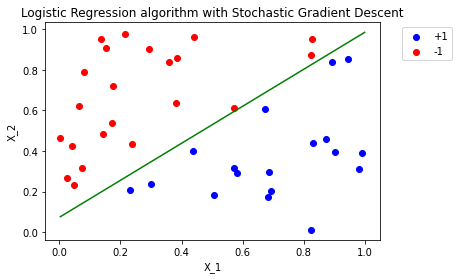

Error Rate: 0.0


In [15]:
# Part 3  SGD Logistic Regression 

# (a) Implement your Logistic Regression algorithm with Stochastic Gradient Descent (SGD) on this dataset 
#     and obtain your wLogisticRegressionSGD. Compared with the logistic regression without SGD.

print("Part3(a)")
time_start_SGD_zeros = time.time()
SGD_zeros = SGD_LogisticReg_algorithm(np.zeros(x_size), 5, 15, x_data, y_data, 10000)
time_end_SGD_zeros = time.time()
print("w_0 = [0, 0, 0] ; learning rate = 5 ; k = 15")
print("w_SGDLogisticRegression:" + str(SGD_zeros["wSGD"]))
print("Iterations: " + str(SGD_zeros["Time"]))
print("Runtime: " + str(time_end_SGD_zeros-time_start_SGD_zeros)+ " seconds")
print("============================================================")


# (b) Apply your wLogisticRegressionSGD to the dataset for binary classification and compute your error rate

print("Part3(b)")
visualization(SGD_zeros["wSGD"], x_data, y_data, "Logistic Regression algorithm with Stochastic Gradient Descent")
error = count_error(SGD_zeros["wSGD"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("============================================================")


Part3(c)


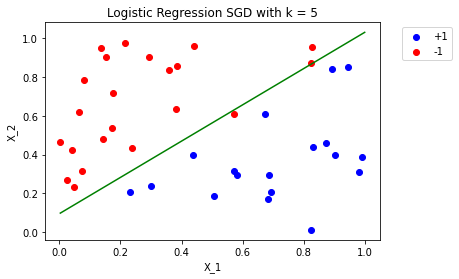

w_SGDLogisticRegression:[  1.13371892  11.19215487 -11.94608797]
Error Rate: 0.025
Iterations: 182
Runtime: 0.014992952346801758 seconds


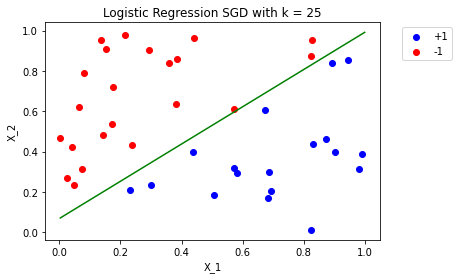

w_SGDLogisticRegression:[  1.17126745  16.01943573 -17.33683534]
Error Rate: 0.0
Iterations: 529
Runtime: 0.12052607536315918 seconds


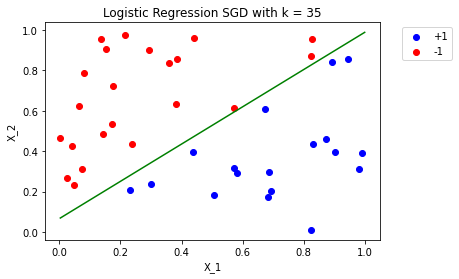

w_SGDLogisticRegression:[  1.20705557  16.60364241 -18.03148468]
Error Rate: 0.0
Iterations: 587
Runtime: 0.1776256561279297 seconds


In [16]:
# Part 3  SGD Logistic Regression 
#(c) Changing the number of samples used in the stochastic gradient computing

print("Part3(c)")
time_start_SGD_zeros_1 = time.time()
SGD_zeros_1 = SGD_LogisticReg_algorithm(np.zeros(x_size), 5, 5, x_data, y_data, 10000)
time_end_SGD_zeros_1 = time.time()
visualization(SGD_zeros_1["wSGD"], x_data, y_data, "Logistic Regression SGD with k = 5")
print("w_SGDLogisticRegression:" + str(SGD_zeros_1["wSGD"]))
error = count_error(SGD_zeros_1["wSGD"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(SGD_zeros_1["Time"]))
print("Runtime: " + str(time_end_SGD_zeros_1-time_start_SGD_zeros_1)+ " seconds")
print("============================================================")

time_start_SGD_zeros_2 = time.time()
SGD_zeros_2 = SGD_LogisticReg_algorithm(np.zeros(x_size), 5, 25, x_data, y_data, 10000)
time_end_SGD_zeros_2 = time.time()
visualization(SGD_zeros_2["wSGD"], x_data, y_data, "Logistic Regression SGD with k = 25")
print("w_SGDLogisticRegression:" + str(SGD_zeros_2["wSGD"]))
error = count_error(SGD_zeros_2["wSGD"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(SGD_zeros_2["Time"]))
print("Runtime: " + str(time_end_SGD_zeros_2-time_start_SGD_zeros_2)+ " seconds")
print("============================================================")

time_start_SGD_zeros_3 = time.time()
SGD_zeros_3 = SGD_LogisticReg_algorithm(np.zeros(x_size), 5, 35, x_data, y_data, 10000)
time_end_SGD_zeros_3 = time.time()
visualization(SGD_zeros_3["wSGD"], x_data, y_data, "Logistic Regression SGD with k = 35")
print("w_SGDLogisticRegression:" + str(SGD_zeros_3["wSGD"]))
error = count_error(SGD_zeros_3["wSGD"], x_data, y_data)
error_rate = error/sample_size
print("Error Rate: " + str(error_rate))
print("Iterations: " + str(SGD_zeros_3["Time"]))
print("Runtime: " + str(time_end_SGD_zeros_3-time_start_SGD_zeros_3)+ " seconds")
print("============================================================")